In [1]:
import nltk

import seaborn as sns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from nltk.stem import PorterStemmer
ps = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lm= WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))

from sklearn.linear_model import LogisticRegression

import lightgbm as lgb
classifier = lgb.LGBMClassifier()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

import spacy
nlp = spacy.load("fr_core_news_sm")

import numpy as np
import pandas as pd 

import tensorflow as tf

from gensim.utils import tokenize

from gensim.models import word2vec

import numpy as np

import re

In [23]:
df = pd.read_csv("./Notes_All.csv")

In [ ]:
for i in range(len(df)):
    df["Commentaire"][i] = re.sub(r'[^\w\s]', ' ',df["Commentaire"][i])

In [4]:
df["Commentaire"] = df["Commentaire"].str.replace(r" +", " ")

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_9680\1340395864.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Commentaire"] = df["Commentaire"].str.replace(r" +", " ")


In [5]:
df = df[df.Commentaire != " "]

In [6]:
df.loc[(df.Note <= 3.5,'Note' )]=0
df.loc[(df.Note >= 3.5,'Note' )]=1

In [7]:
df['Note'] = le.fit_transform(df['Note'])

In [8]:
note_oui = df[df.Note & df.Note == 1]

In [9]:
note_non = df[df.Note & df.Note == 0]

In [10]:
df_equal = pd.concat([note_non, note_oui.sample(n=len(note_non),random_state=42)],ignore_index=True)

In [11]:
corpus = []
for i in range(0, len(df_equal)):
    words = nltk.word_tokenize(str(df_equal['Commentaire'][i]))
    words = [word for word in words if word.isalnum()]
    WordSet = []
    for word in words:
        if word not in set(stopwords.words("french")):
            WordSet.append(word)
    WordSetStem = []
    for word in WordSet:
        WordSetStem.append(stemmer.stem(word))
    WordSetLem = []
    for word in WordSetStem:
        words = WordSetLem.append(lm.lemmatize(word))
    message = ' '.join(WordSetLem)
    corpus.append(message)

In [12]:
X = pd.DataFrame(corpus,columns= ["Commentaire"])

y = df_equal["Note"]

In [13]:
df_clean = pd.concat([X,df_equal["Note"]],axis=1)

In [14]:
df_clean = df_clean[df_clean.Commentaire != ""]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_clean["Commentaire"], df_clean['Note'], test_size=0.2, random_state=0)


In [89]:
X_train = pd.DataFrame(X_train)

In [91]:
X_train.columns = ["Commentaire"]

In [92]:
y_train = pd.DataFrame(y_train)

In [93]:
y_train.columns = ["Note"]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
from sklearn.pipeline import make_pipeline

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Method pipeline : CountVectorizer - RandomForestClassifie

In [19]:
pipe = make_pipeline(
    CountVectorizer(),
    RandomForestClassifier(random_state=0)

)

In [21]:
pipe_fitted = pipe.fit(X_train,y_train)

In [22]:
pipe_fitted.score(X_test,y_test)

0.7925925925925926

In [24]:
pipe_fitted.predict(["Ce film est mauvais et un échec"])

array([1], dtype=int64)

In [25]:
parameters = {
    'countvectorizer__max_features' : (None, 1000, 2000),
    'countvectorizer__ngram_range' : ((1,1),(1,2),(2,2)),
    'countvectorizer__stop_words' : (None, "french"),
    'randomforestclassifier__n_estimators' : (50,100,200) 
}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
search_model = GridSearchCV(pipe, parameters, cv=3, n_jobs=-1)

In [ ]:
search_model.fit(X_train, y_train)

In [ ]:
search_model.best_estimator_

In [ ]:
search_model.best_params_

In [ ]:
search_model.best_score_

In [33]:
search_model.predict(["Ceci est un film nul"])

array([1], dtype=int64)

# Matrice de confusion

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       259
           1       0.78      0.78      0.78       237

    accuracy                           0.79       496
   macro avg       0.79      0.79      0.79       496
weighted avg       0.79      0.79      0.79       496

Accuracy of LightGBM Model: 78.83064516129032 %


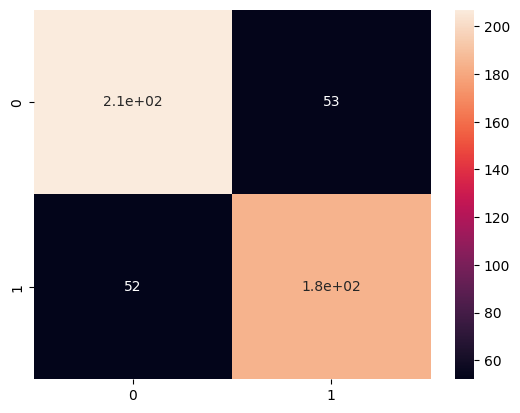

In [ ]:
y_pred = pipe_fitted.predict(X_test)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Accuracy of LightGBM Model:", acc*100,"%")

In [ ]:
test = ["Ce film est nul à surtout pas revoir"]

In [ ]:
test_list = []
for i in range(0, len(test)):
    words = nltk.word_tokenize(str(test))
    words = [word for word in words if word.isalnum()]
    WordSet = []
    for word in words:
        if word not in set(stopwords.words("french")):
            WordSet.append(word)
    WordSetStem = []
    for word in WordSet:
        WordSetStem.append(stemmer.stem(word))
    WordSetLem = []
    for word in WordSetStem:
        words = WordSetLem.append(lm.lemmatize(word))
    message = ' '.join(WordSetLem)
    test_list.append(message)

In [ ]:
# test_vec = tfidf.transform(test_list)
test_w2v = word2vec_features(test_list, model)
classifier.predict(test_w2v)

array([1], dtype=int64)

# World Cloud

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

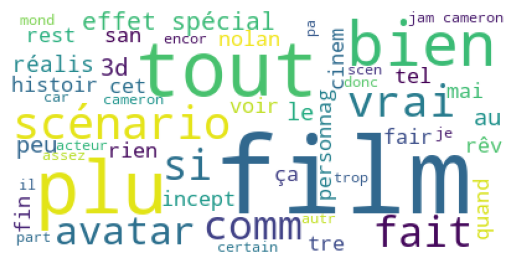

In [21]:
wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(str(corpus))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

# Sentiment Analyzer

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [43]:
sid = SentimentIntensityAnalyzer()

In [51]:
df_clean["sentiments"] = df_clean['Commentaire'].apply(lambda x: sid.polarity_scores(x))
df_clean = pd.concat([df_clean.drop(['sentiments'], axis=1), df_clean['sentiments'].apply(pd.Series)], axis=1)

In [54]:
df_clean["nb_chars"] = df_clean["Commentaire"].apply(lambda x: len(x))

In [56]:
df_clean["nb_words"] = df_clean["Commentaire"].apply(lambda x: len(x.split(" ")))

In [57]:
df_clean

,Commentaire,Note,neg,neu,pos,compound,nb_chars,nb_words
0,cert film graphiqu magnif presqu somptueux le ...,0,0.073,0.769,0.158,0.6486,407,66
1,avatar où film plus surcot planet jam cameron ...,0,0.028,0.919,0.053,0.5267,1030,171
2,en 2009 peu dir avatar le anné entre ceux lais...,0,0.052,0.892,0.056,0.5994,2648,455
3,film impression visuel seul personnag total cr...,0,0.031,0.930,0.039,0.1027,283,48
4,un film propos voyag pandor planet natur luxur...,0,0.000,0.972,0.028,0.2263,453,69
...,...,...,...,...,...,...,...,...
3023,un chef nolan summum art acteur charismat dica...,1,0.000,1.000,0.000,0.0000,109,17
3024,le jeu tous acteur tres bien mario cotillard v...,1,0.000,1.000,0.000,0.0000,158,27
3025,tout simpl magnif cameron létat pur voit film ...,1,0.059,0.706,0.235,0.6705,140,22
3026,tres tres réuss léonardo di caprio vrai fantas...,1,0.000,1.000,0.000,0.0000,94,19


In [58]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [59]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_clean["Commentaire"].apply(lambda x: x.split(" ")))]


In [60]:
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [61]:
doc2vec_df = df_clean["Commentaire"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([df_clean, doc2vec_df], axis=1)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df_clean["Commentaire"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_clean.index
reviews_df = pd.concat([df_clean, tfidf_df], axis=1)

c:\VENV\venv_win\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
df_clean["Note"].value_counts(normalize = True)

1    0.500165
0    0.499835
Name: Note, dtype: float64

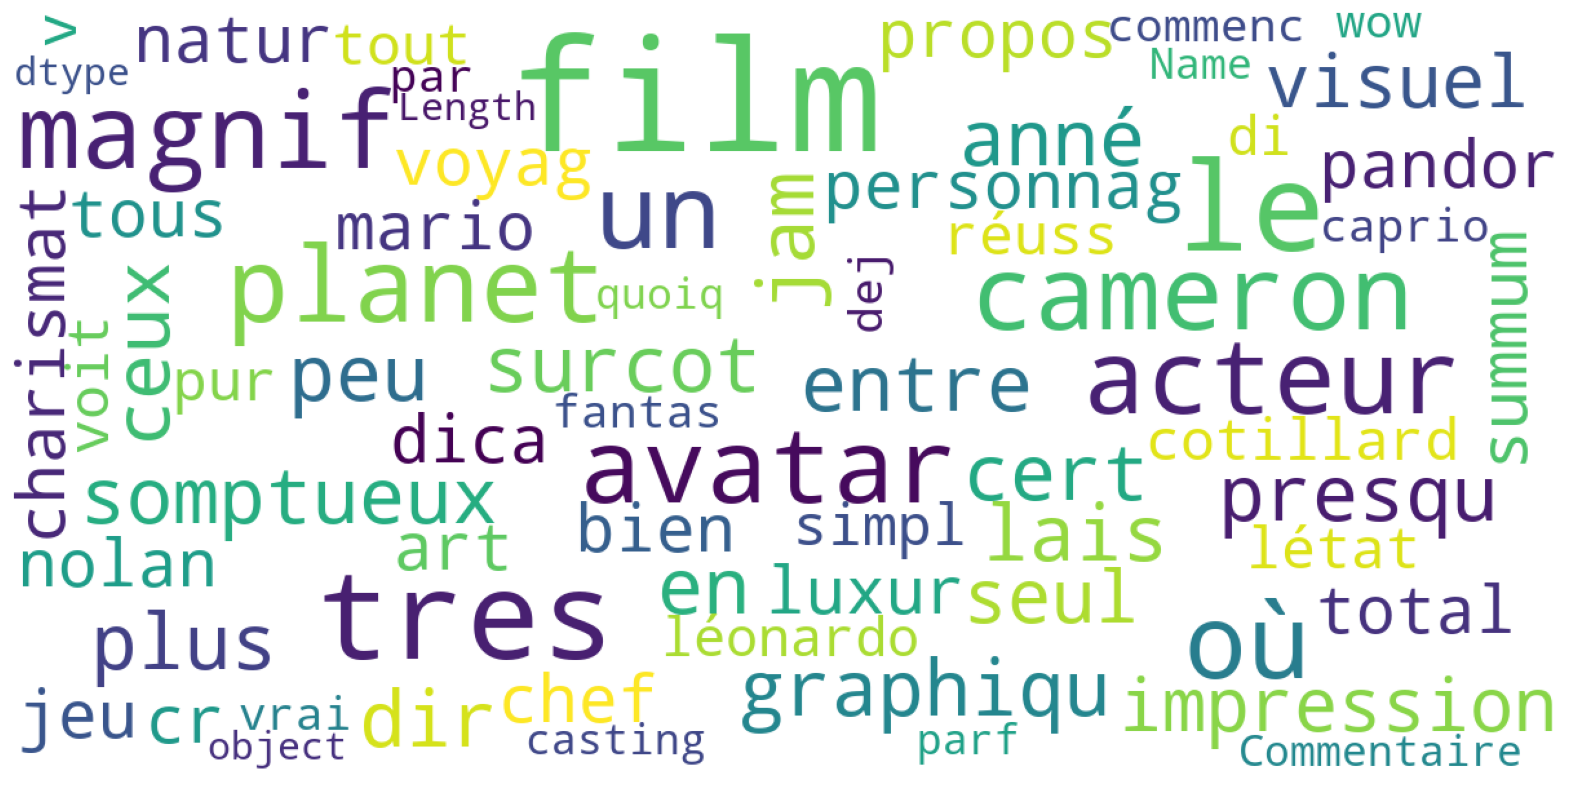

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_clean["Commentaire"])

In [68]:
df_clean[df_clean["nb_words"] >= 5].sort_values("pos", ascending = False)[["Commentaire", "pos"]].head(10)

,Commentaire,pos
1898,excellent film just dem point trop violenc mai...,0.561
1601,excellent sup film a voir,0.552
1763,excellent effet histoir tient debout grand mor...,0.528
1897,excellent scénario mi scen halet excellent act...,0.514
2325,vrai top le scénario vrai top acteur excellent...,0.510
2676,un excellent divert 3d surcroit,0.481
1962,excellent pas sup moment voir,0.481
2288,excellent film un nouveau cinem,0.481
1608,excellent film crois a rien ajout,0.481
2789,film tres grand original indispens a voir fin ...,0.469


In [69]:
df_clean[df_clean["nb_words"] >= 5].sort_values("neg", ascending = False)[["Commentaire", "neg"]].head(10)

,Commentaire,neg
1059,incept quel ennui indescriptibl si problem reg...,0.380
2049,tout simpl bomb la 3d enorm a voir absolu cet fin,0.370
288,de merveil imag gross fabl écolog encor rebond...,0.340
2077,3 un rêv tout simpl 3,0.333
1688,tout simpl génial a voir,0.333
1960,tout simpl magnif a revoir p,0.333
996,nullissim je jam vu film au long stupid malgr ...,0.329
1327,je just impatient voir ça don,0.306
896,quel décept trouv film long ennui,0.306
1841,pu alle peu plus loin 3d,0.296


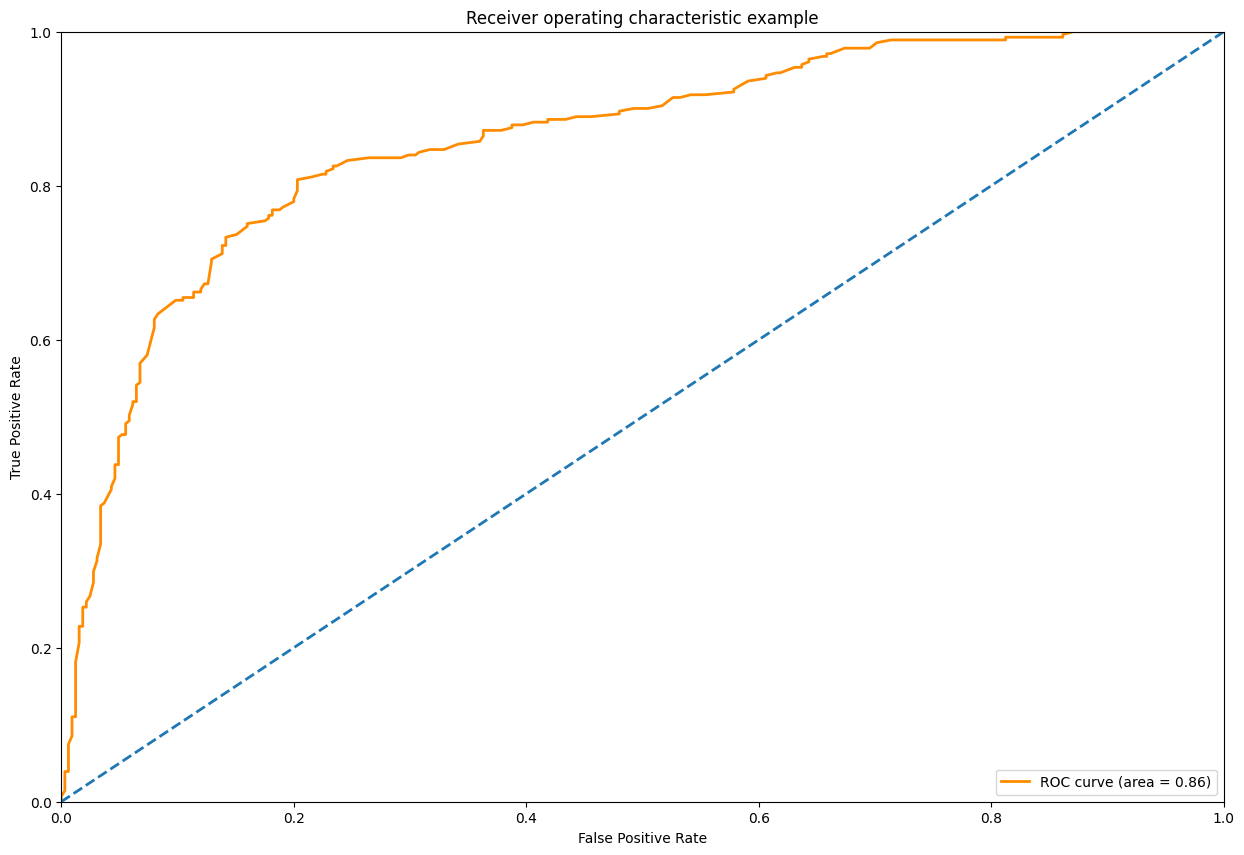

In [71]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in search_model.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()